Импорт библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, adjusted_rand_score

Обработка датасета

In [3]:
df = pd.read_csv('/content/films.csv')
df.tail(10)

,Категория,Страна,Оценка зрителей,Оценка сайта,Оценка IMDb,Год выхода
3872,мультфильмы,США,7.8,0,6.5,1996
3873,комедия,Германия,6.6,0,6.3,2006
3874,драма,США,7.1,0,6.3,2005
3875,драма,США,7.2,0,6.3,1994
3876,драма,США,0.0,0,6.8,2014
3877,драма,США,7.2,0,6.1,2001
3878,триллер,США,7.2,0,5.9,2007
3879,драма,США,6.2,0,5.9,2018
3880,драма,США,0.0,0,5.9,1991
3881,драма,США,6.5,0,5.8,2012


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3882 entries, 0 to 3881
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Категория        3882 non-null   object 
 1   Страна           3882 non-null   object 
 2   Оценка зрителей  3882 non-null   float64
 3   Оценка сайта     3882 non-null   int64  
 4   Оценка IMDb      3882 non-null   float64
 5   Год выхода       3882 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 182.1+ KB


In [5]:
#Удаляем дубликаты
df = df.drop_duplicates()
print("Датасет после удаления дубликатов:")
df.info()

Датасет после удаления дубликатов:
<class 'pandas.core.frame.DataFrame'>
Index: 3297 entries, 0 to 3881
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Категория        3297 non-null   object 
 1   Страна           3297 non-null   object 
 2   Оценка зрителей  3297 non-null   float64
 3   Оценка сайта     3297 non-null   int64  
 4   Оценка IMDb      3297 non-null   float64
 5   Год выхода       3297 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 180.3+ KB


In [6]:
# Нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[["Оценка зрителей", "Оценка сайта", "Оценка IMDb","Год выхода"]])

# Применение DBSCAN для удаления выборосов
dbscan = DBSCAN(eps=0.5, min_samples=2)
df['cluster'] = dbscan.fit_predict(scaled_data)
df = df[df['cluster'] != -1]
print(df)
df.info()
new_df = df.drop(['cluster'], axis='columns')

         Категория Страна  Оценка зрителей  Оценка сайта  Оценка IMDb  \
0     мультфильмы     США              6.7             0          9.0   
1     мультфильмы     США              5.5             0          8.7   
2     мультфильмы     США              6.6             0          8.5   
3     мультфильмы     США              7.0             0          8.4   
4     мультфильмы     США              7.5             0          8.4   
...            ...    ...              ...           ...          ...   
3877        драма     США              7.2             0          6.1   
3878      триллер     США              7.2             0          5.9   
3879        драма     США              6.2             0          5.9   
3880        драма     США              0.0             0          5.9   
3881        драма     США              6.5             0          5.8   

     Год выхода  cluster  
0          1992        0  
1          2004        0  
2          2001        0  
3          2019

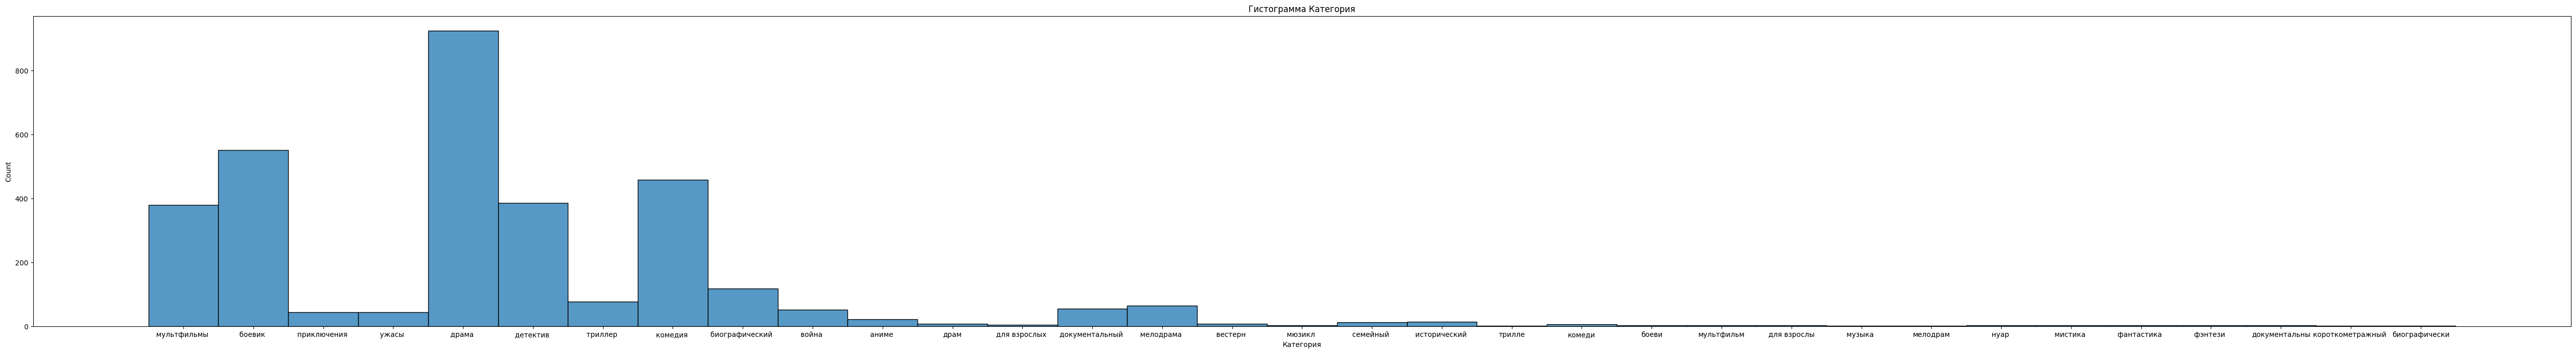

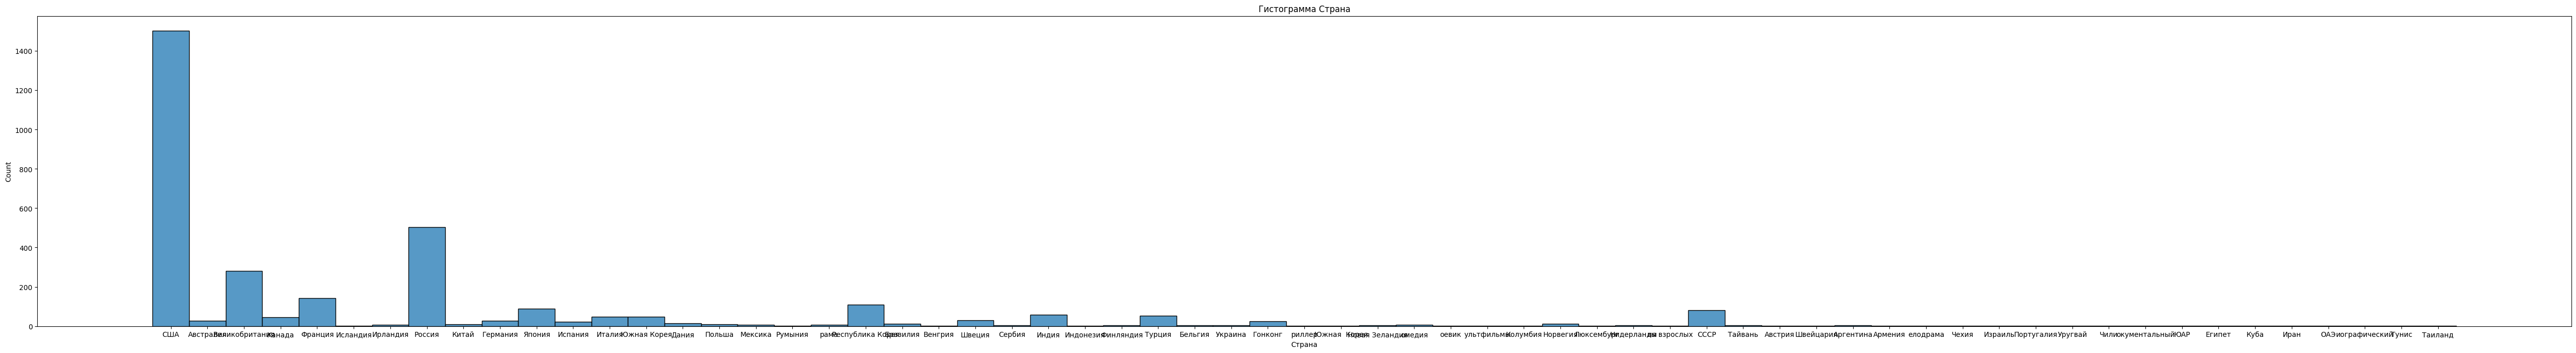

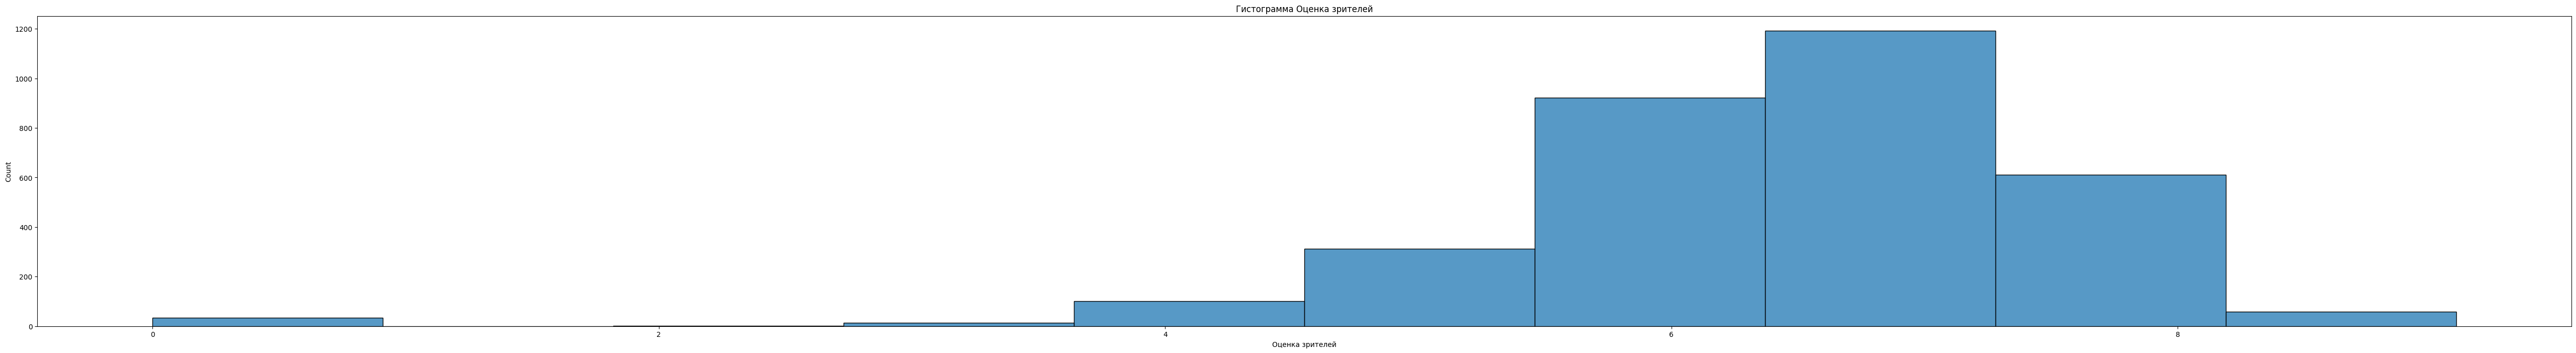

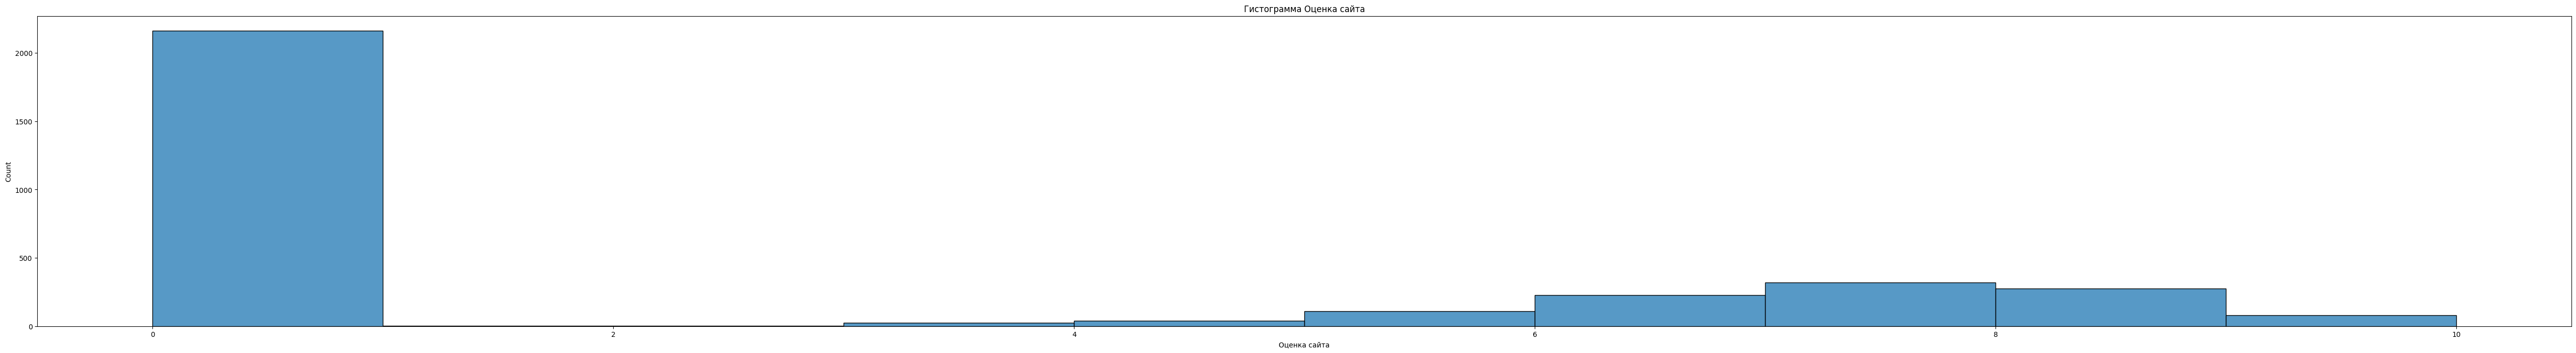

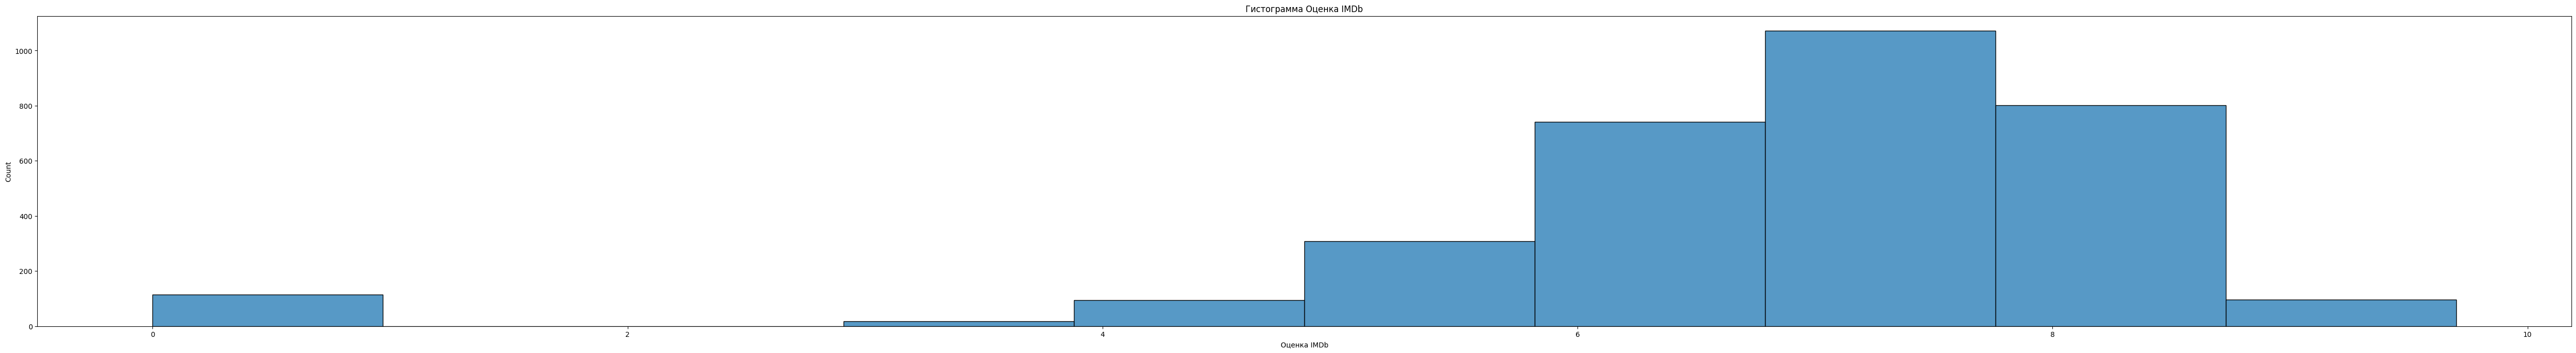

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2407 (\N{DEVANAGARI DIGIT ONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2415 (\N{DEVANAGARI DIGIT NINE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2414 (\N{DEVANAGARI DIGIT EIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2410 (\N{DEVANAGARI DIGIT FOUR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


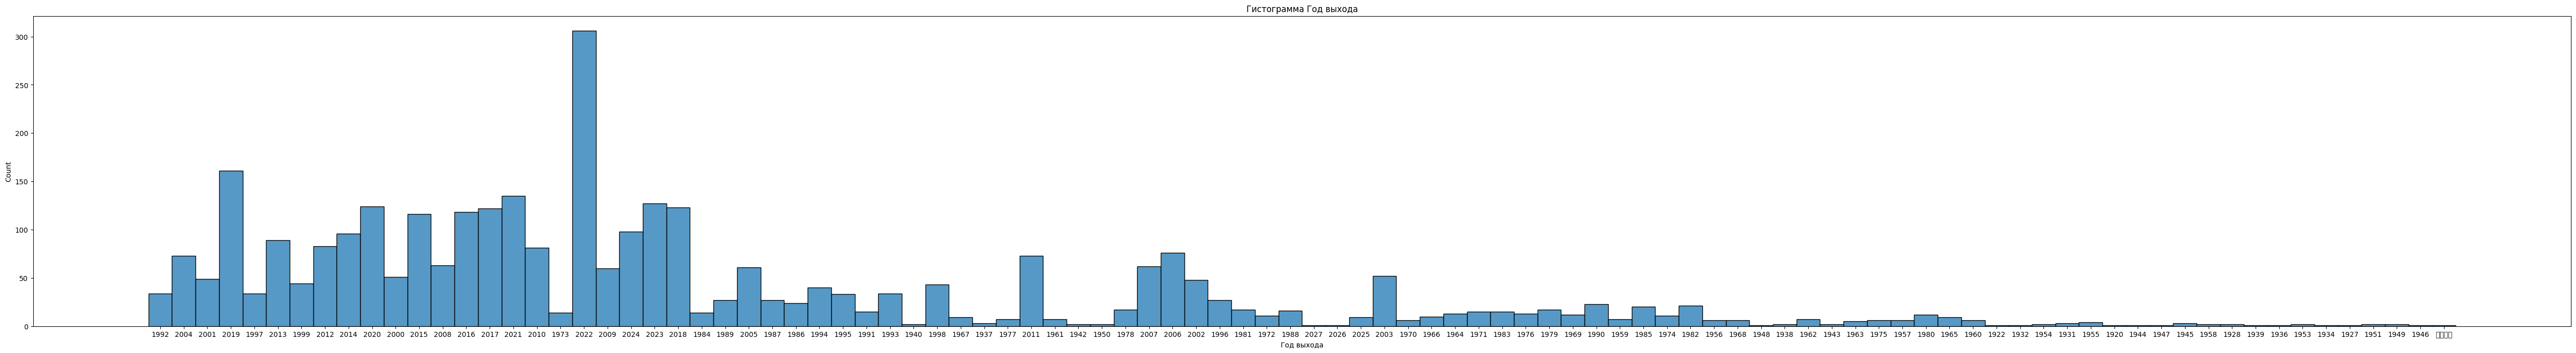

In [7]:
# Гистограммы для каждого признака
for column in new_df.columns:
    plt.figure(figsize=(65, 8))
    sns.histplot(new_df[column], bins=10)
    plt.title(f'Гистограмма {column}')
    plt.show()

По диаграммам оценок довольно очевидно, что для каждого из их "типов" есть свои зависимости. Так, например, по диаграмме оценок сайта видно, что большее число проставленных значений - 0, что может говорить как и о низком рейтинге, так и о том, что значения могли быть просто не проставлены. Если мы обратимся к диаграммам оценок зрителей и IMDb, то увидим, что у них довольно мало 0, отсюда делаем вывод, что вероятней всего сайт просто не проставил оценки фильмам.

Категория
драма                924
боевик               551
комедия              457
детектив             386
мультфильмы          379
биографический       117
триллер               76
мелодрама             64
документальный        55
война                 51
ужасы                 44
приключения           43
аниме                 22
исторический          13
семейный              12
драм                   8
вестерн                7
комеди                 6
для взрослых           4
мистика                3
мюзикл                 3
фэнтези                3
документальны          2
мультфильм             2
нуар                   2
для взрослы            2
боеви                  2
фантастика             2
музыка                 1
мелодрам               1
короткометражный       1
трилле                 1
биографически          1
Name: count, dtype: int64


Text(0, 0.5, 'Кол-во категорий')

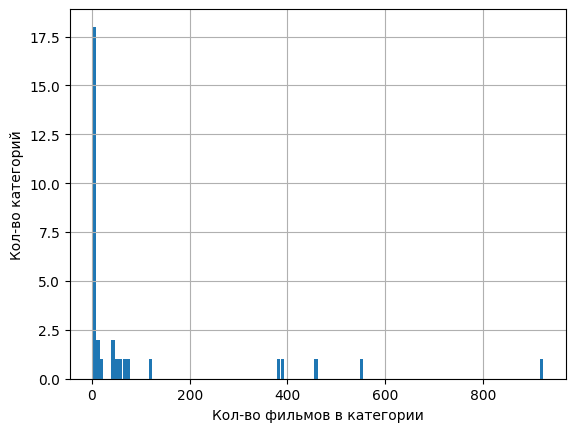

In [8]:
#Рассмотрим гистограмму для категорий подробнее
category = new_df.value_counts('Категория')
print(category)
category.hist(bins=120, rwidth=0.9)
plt.xlabel('Кол-во фильмов в категории')
plt.ylabel('Кол-во категорий')

Категория
драма                924
боевик               551
комедия              457
детектив             386
мультфильмы          379
биографический       117
триллер               76
мелодрама             64
документальный        55
война                 51
ужасы                 44
приключения           43
аниме                 22
исторический          13
семейный              12
вестерн                7
для взрослых           4
мистика                3
мюзикл                 3
фэнтези                3
нуар                   2
фантастика             2
музыка                 1
короткометражный       1
Name: count, dtype: int64


Text(0, 0.5, 'Кол-во категорий')

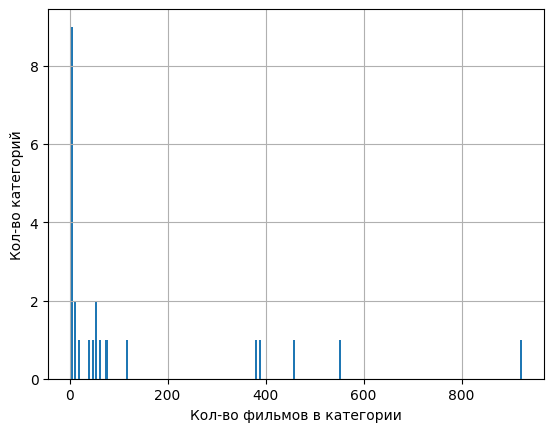

In [9]:
#Очищаем выборку
new_df = new_df[(new_df['Категория'] != 'драм') & (new_df['Категория'] != 'комеди') & (new_df['Категория'] != 'документальны') & (new_df['Категория'] != 'мультфильм')  & (new_df['Категория'] != 'для взрослы')  & (new_df['Категория'] != 'боеви')  & (new_df['Категория'] != 'мелодра')  & (new_df['Категория'] != 'трилле')  & (new_df['Категория'] != 'биографически')]
correct_category = category.drop(['драм', 'комеди', 'документальны', 'мультфильм', 'для взрослы', 'боеви', 'мелодрам', 'трилле', 'биографически'])
print(correct_category)
correct_category.hist(bins=130, rwidth=0.6)
plt.xlabel('Кол-во фильмов в категории')
plt.ylabel('Кол-во категорий')

Text(0, 0.5, 'Кол-во категорий')

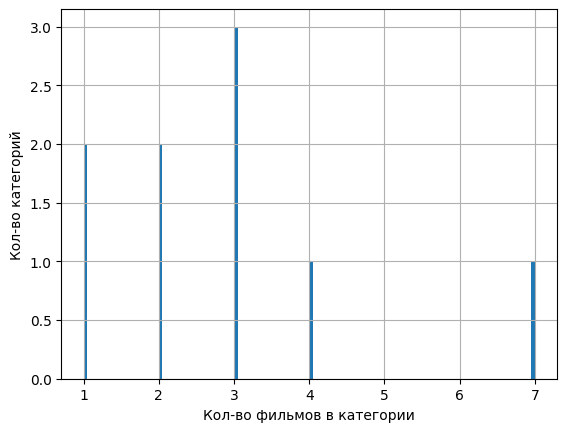

In [10]:
correct_category[correct_category <= 10].hist(bins=120, rwidth=0.9)
plt.xlabel('Кол-во фильмов в категории')
plt.ylabel('Кол-во категорий')
#Можно сделать вывод, что представлено больше жанров, у которых в текущей выборке представлено < 10 фильмов

Страна
США                 1503
Россия               504
Великобритания       280
Франция              143
Республика Корея     109
Япония                89
СССР                  81
Индия                 57
Турция                52
Италия                49
Южная Корея           48
Канада                46
Швеция                31
Германия              28
Австралия             26
Гонконг               24
Испания               21
Дания                 14
Бразилия              11
Норвегия              11
Китай                 10
Польша                10
Мексика                7
Ирландия               6
Новая Зеландия         5
Бельгия                5
Финляндия              4
Тайвань                4
Аргентина              3
Украина                3
Нидерланды             3
Сербия                 3
Индонезия              2
ЮАР                    2
Венгрия                2
Иран                   2
Исландия               2
Португалия             2
Колумбия               2
Австрия           

Text(0, 0.5, 'Кол-во стран')

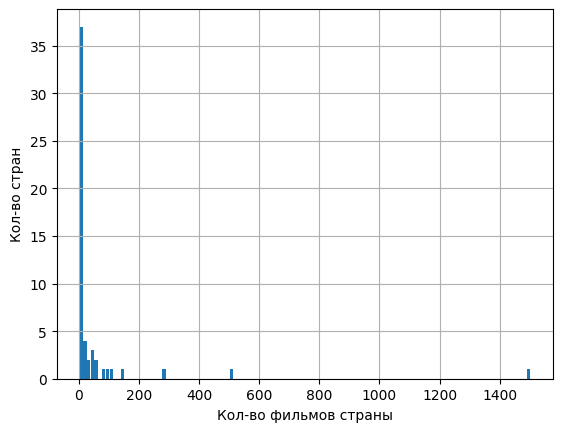

In [11]:
#Рассмотрим гистограмму для стран подробнее
countries = new_df.value_counts('Страна')
print(countries)
countries.hist(bins=120, rwidth=0.9)
plt.xlabel('Кол-во фильмов страны')
plt.ylabel('Кол-во стран')
# Сразу бросается в глаза аналогичная ситуация: в выборке много стран, имеющих по небольшому кол-ву фильмов, и при этом мы хорошо видим абсолютных лидеров - США, Россия, UK

In [12]:
#Очищаем выборку
new_df = new_df[(new_df['Страна'] != 'елодрама') & (new_df['Страна'] != 'Южная  Корея')]
correct_countries = countries.drop(['елодрама'])
correct_countries = correct_countries.drop(['Южная  Корея'])
print(correct_countries)

Страна
США                 1503
Россия               504
Великобритания       280
Франция              143
Республика Корея     109
Япония                89
СССР                  81
Индия                 57
Турция                52
Италия                49
Южная Корея           48
Канада                46
Швеция                31
Германия              28
Австралия             26
Гонконг               24
Испания               21
Дания                 14
Бразилия              11
Норвегия              11
Китай                 10
Польша                10
Мексика                7
Ирландия               6
Новая Зеландия         5
Бельгия                5
Финляндия              4
Тайвань                4
Аргентина              3
Украина                3
Нидерланды             3
Сербия                 3
Индонезия              2
ЮАР                    2
Венгрия                2
Иран                   2
Исландия               2
Португалия             2
Колумбия               2
Австрия           

Text(0, 0.5, 'Кол-во стран')

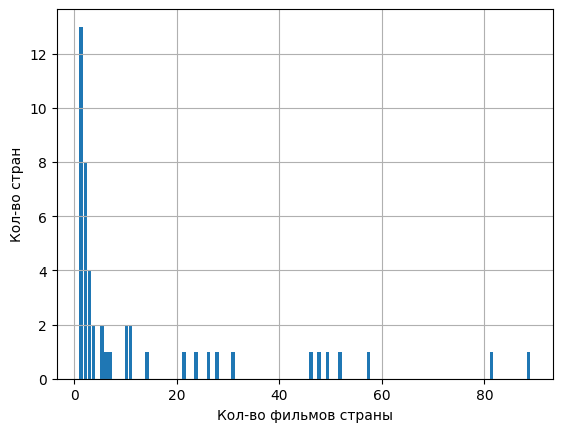

In [13]:
correct_countries[correct_countries <= 100].hist(bins=110, rwidth=0.9)
plt.xlabel('Кол-во фильмов страны')
plt.ylabel('Кол-во стран')

Год выхода
2022    304
2019    160
2021    133
2023    127
2018    123
       ... 
1936      1
1934      1
1932      1
1927      1
१९८४      1
Name: count, Length: 98, dtype: int64


Text(0, 0.5, 'Кол-во лет')

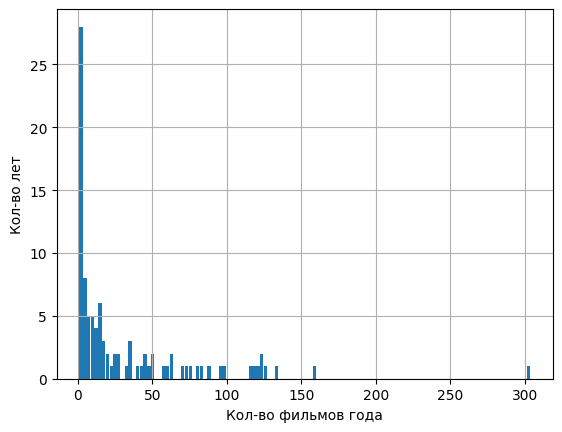

In [14]:
#Рассмотрим гистограмму для признака "Год выхода" подробнее
years = new_df.value_counts('Год выхода')
print(years)
years.hist(bins=120, rwidth=0.9)
plt.xlabel('Кол-во фильмов года')
plt.ylabel('Кол-во лет')


Год выхода
2022    304
2019    160
2021    133
2023    127
2018    123
       ... 
1939      1
1936      1
1934      1
1932      1
1927      1
Name: count, Length: 93, dtype: int64


Text(0, 0.5, 'Кол-во лет')

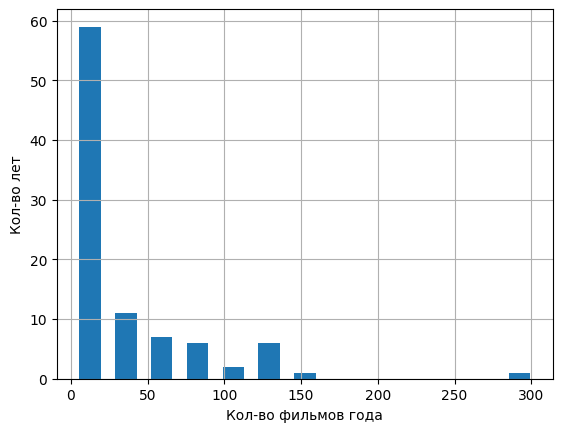

In [15]:
#Очищаем выборку
new_df = new_df[(new_df['Год выхода'] >= '1900') & (new_df['Год выхода'] <= '2023')]
correct_years = years[(years.index >='1900') & (years.index <='2023')]
print(correct_years)
correct_years.hist(bins=13, rwidth=0.6)
plt.xlabel('Кол-во фильмов года')
plt.ylabel('Кол-во лет')

#Можно сделать вывод о том, что современных фильмов в выборке больше, но при этом есть большое "разнообразие возрастов" старых фильмов,
#даже если они представлены в малом кол-ве экземпляров

Год выхода
2013    89
2012    82
2010    81
2006    76
2011    72
        ..
1939     1
1936     1
1934     1
1932     1
1927     1
Name: count, Length: 83, dtype: int64


Text(0, 0.5, 'Кол-во лет')

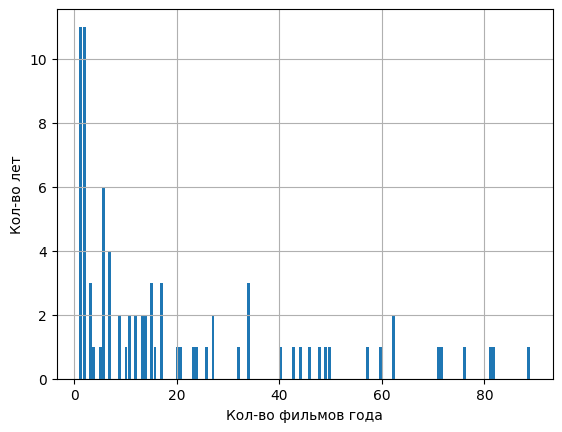

In [16]:
print(correct_years[correct_years <= 90])
correct_years[correct_years <= 90].hist(bins=140, rwidth=0.9)
plt.xlabel('Кол-во фильмов года')
plt.ylabel('Кол-во лет')

In [17]:
#расчет кол-ва 0 в оценке IMDb
res = new_df['Оценка IMDb'].tolist()
correct_res = res.count(0)
print(correct_res)

87


In [18]:
#расчет кол-ва 0 в оценке зрителей
res = new_df['Оценка зрителей'].tolist()
correct_res = res.count(0)
print(correct_res)

15


In [19]:
#просмот оценок сайта
new_df.value_counts('Оценка сайта')
#безусловный лидер - оценка 0

,count
Оценка сайта,
0,2092
7,307
8,264
6,215
5,98
9,57
4,35
3,22
10,15


In [20]:
df_answers = pd.get_dummies(new_df).astype(int)
df_answers

,Оценка зрителей,Оценка сайта,Оценка IMDb,Категория_аниме,Категория_биографический,Категория_боевик,Категория_вестерн,Категория_война,Категория_детектив,Категория_для взрослых,...,Год выхода_2014,Год выхода_2015,Год выхода_2016,Год выхода_2017,Год выхода_2018,Год выхода_2019,Год выхода_2020,Год выхода_2021,Год выхода_2022,Год выхода_2023
0,6,0,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7,0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,7,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3878,7,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,6,0,5,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3880,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


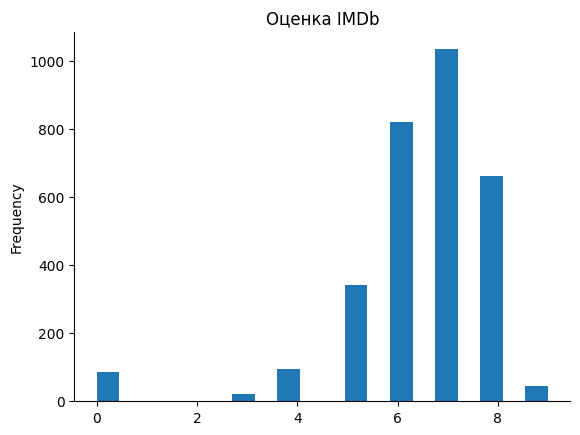

In [21]:
#Рассмотрим еще несколько графиков и проанализируем зависимости
#Графики частот для численных признаков-оценок:

df_answers['Оценка IMDb'].plot(kind='hist', bins=20, title='Оценка IMDb')
plt.gca().spines[['top', 'right',]].set_visible(False)

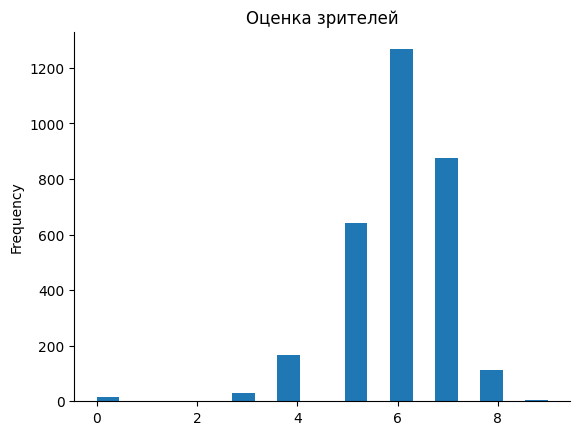

In [22]:
df_answers['Оценка зрителей'].plot(kind='hist', bins=20, title='Оценка зрителей')
plt.gca().spines[['top', 'right',]].set_visible(False)


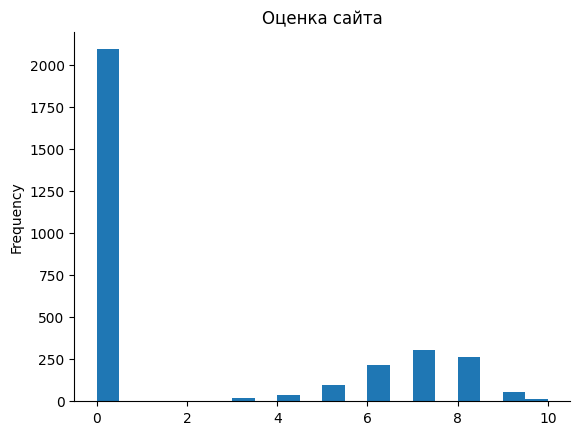

In [23]:
df_answers['Оценка сайта'].plot(kind='hist', bins=20, title='Оценка сайта')
plt.gca().spines[['top', 'right',]].set_visible(False)

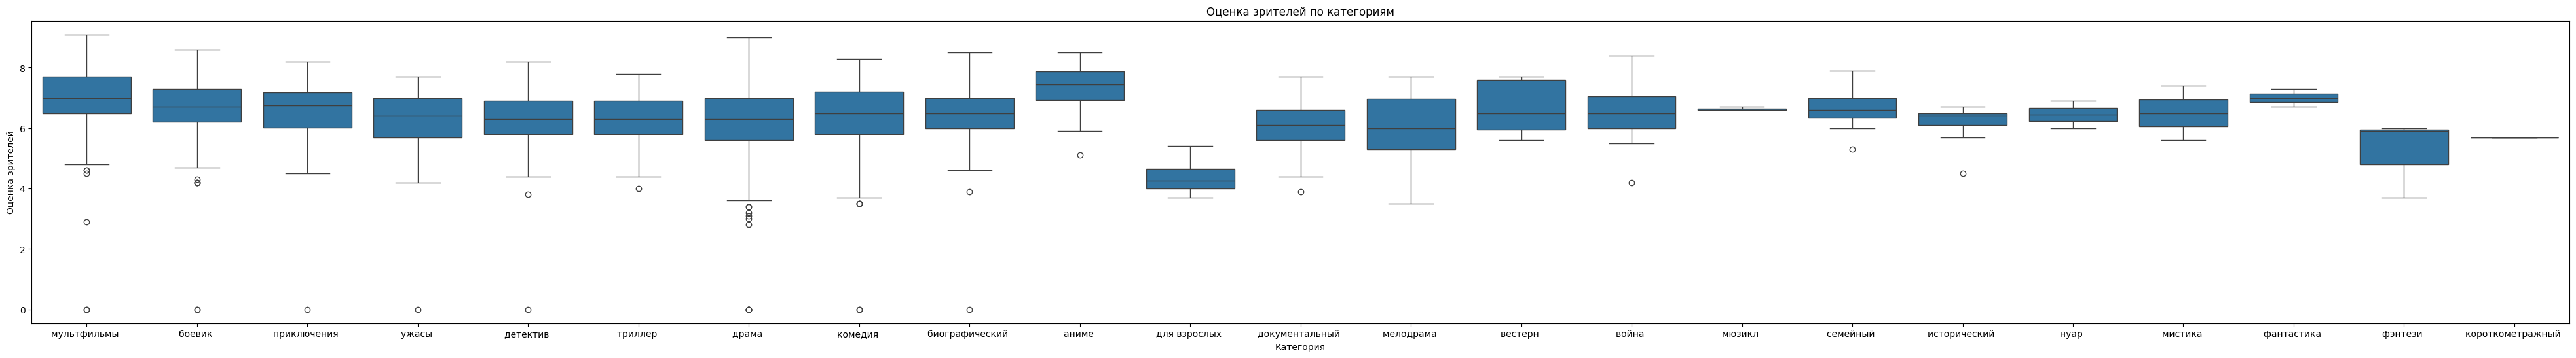

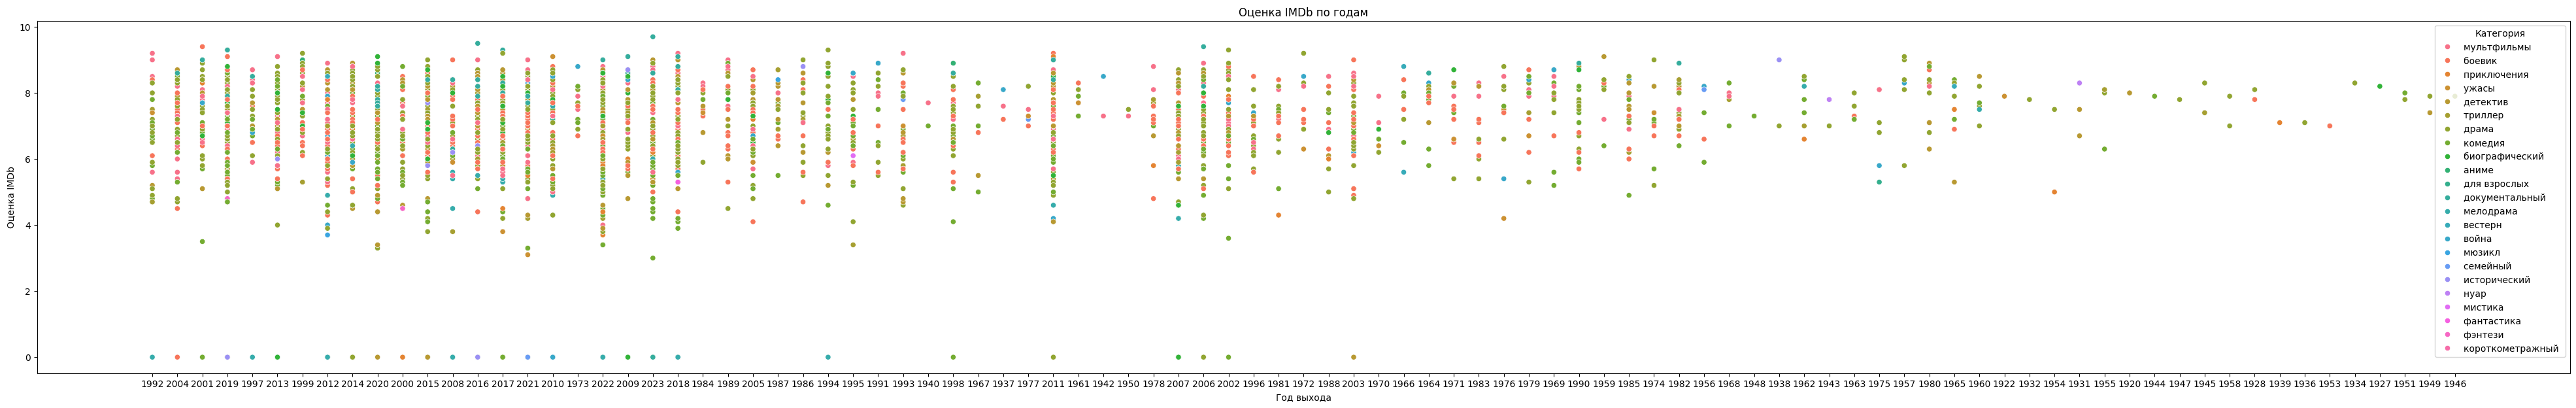

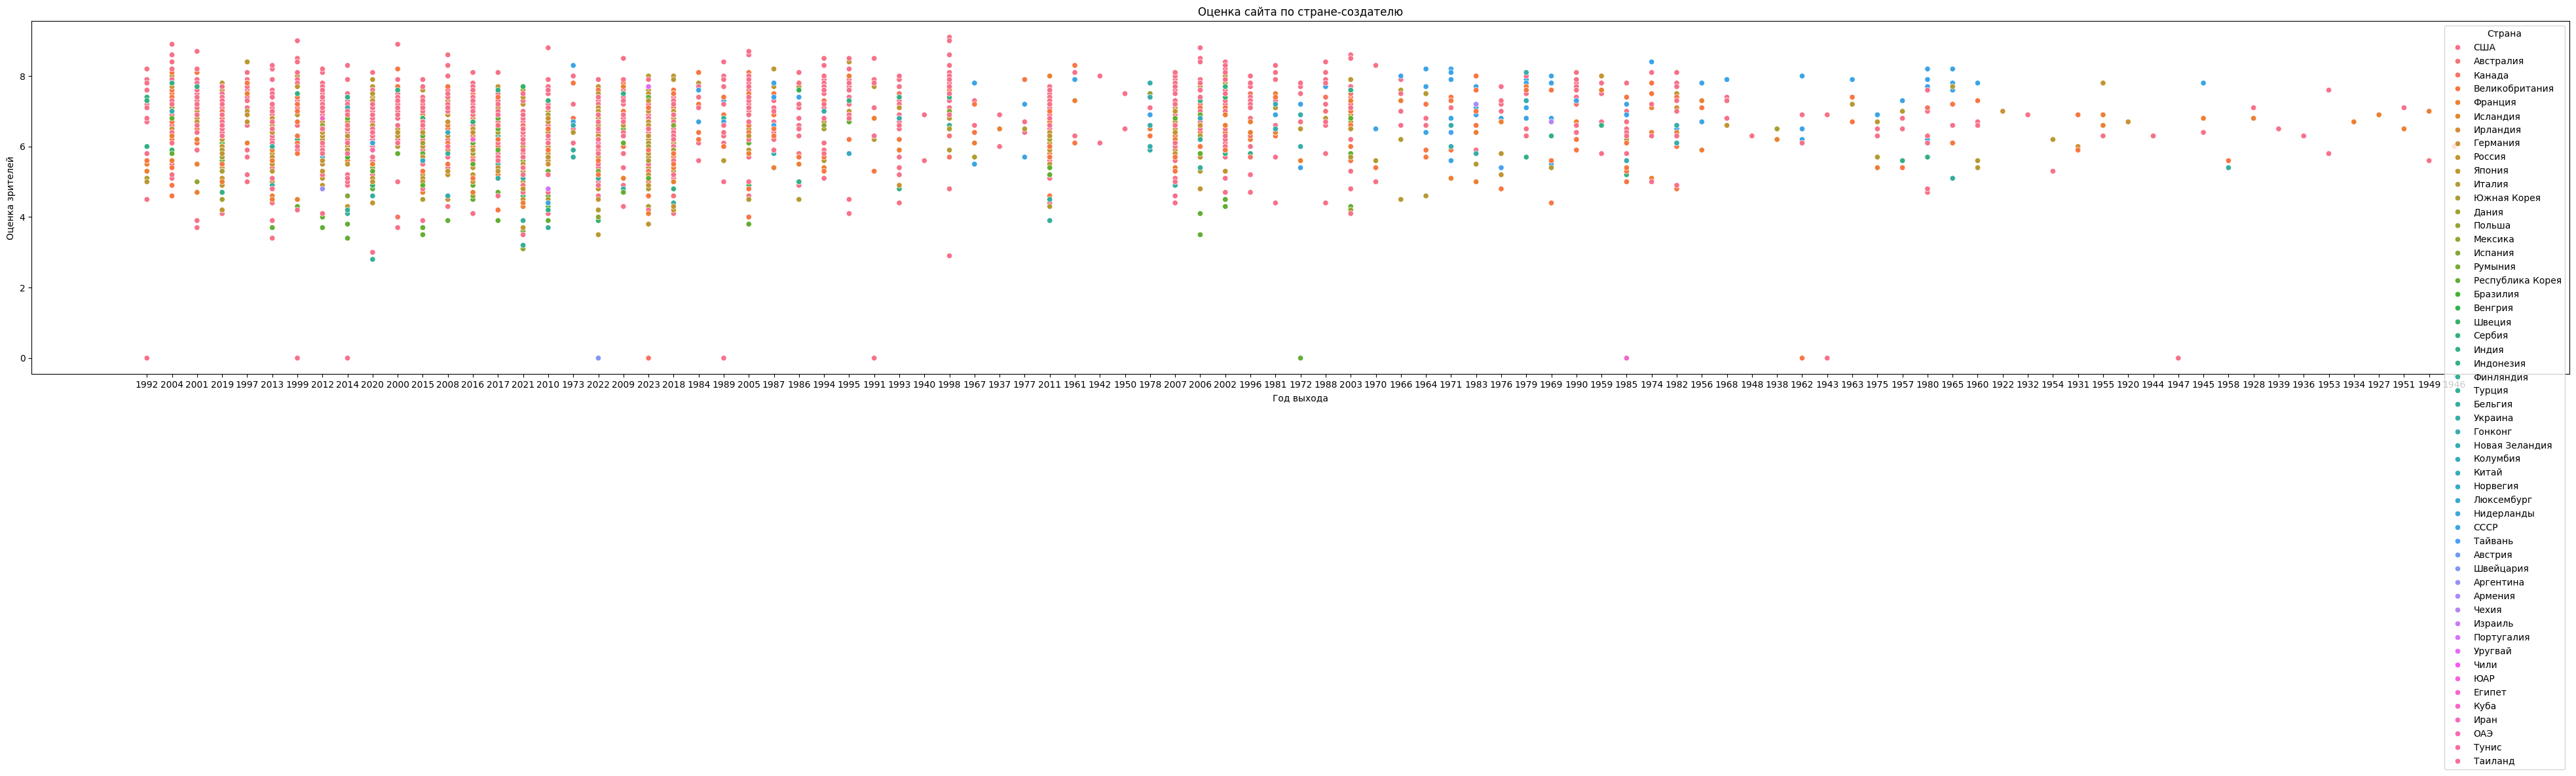

In [24]:
plt.figure(figsize=(50, 6))
sns.boxplot(x='Категория', y='Оценка зрителей', data=new_df)
plt.title('Оценка зрителей по категориям')
plt.show()
# Можно сказать, что в среднем показатели оценок зрителей для всех категорий примерно одинаковы, наименьшее хначение - у категории "для взрослых"

plt.figure(figsize=(50, 7))
sns.scatterplot(data=new_df, x='Год выхода', y='Оценка IMDb', hue='Категория')
plt.title('Оценка IMDb по годам')
plt.show()
# Визуально кажется, что преобладающим цветом является зеленый и его оттенки, при этом поточечно самые высокие оценки у бирюзового цвета (соотвествующие данным цветам категории можно увидеть на легенде графика)

plt.figure(figsize=(50, 7))
sns.scatterplot(data=new_df, x='Год выхода', y='Оценка зрителей', hue='Страна')
plt.title('Оценка сайта по стране-создателю')
plt.show()

# Визуально кажется, что преобладающим цветом является розовый/оранжевый и его оттенки (соотвествующие данным цветам категории можно увидеть на легенде графика)

Задача: разделить страны-создатели фильмов на наиболее и наименее популярные, используя все имеющиеся типы оценок

Реализация baseline-решения с помощью k-means

              Страна           Popularity  Оценка зрителей  Оценка сайта  \
0          Австралия  Наиболее популярные         6.084615      3.115385   
27    Новая Зеландия  Наиболее популярные         7.040000      2.800000   
28          Норвегия  Наиболее популярные         6.236364      2.000000   
30            Польша  Наиболее популярные         5.670000      2.800000   
31        Португалия  Наиболее популярные         5.300000      0.000000   
32  Республика Корея  Наиболее популярные         5.625000      0.842593   
33            Россия  Наиболее популярные         6.240546      1.955882   
35              СССР  Наиболее популярные         7.229630      0.000000   
36               США  Наиболее популярные         6.646667      2.950000   
37            Сербия  Наиболее популярные         6.400000      2.000000   
51       Южная Корея  Наиболее популярные         5.954167      0.583333   
38           Таиланд  Наиболее популярные         5.800000      0.000000   
41          

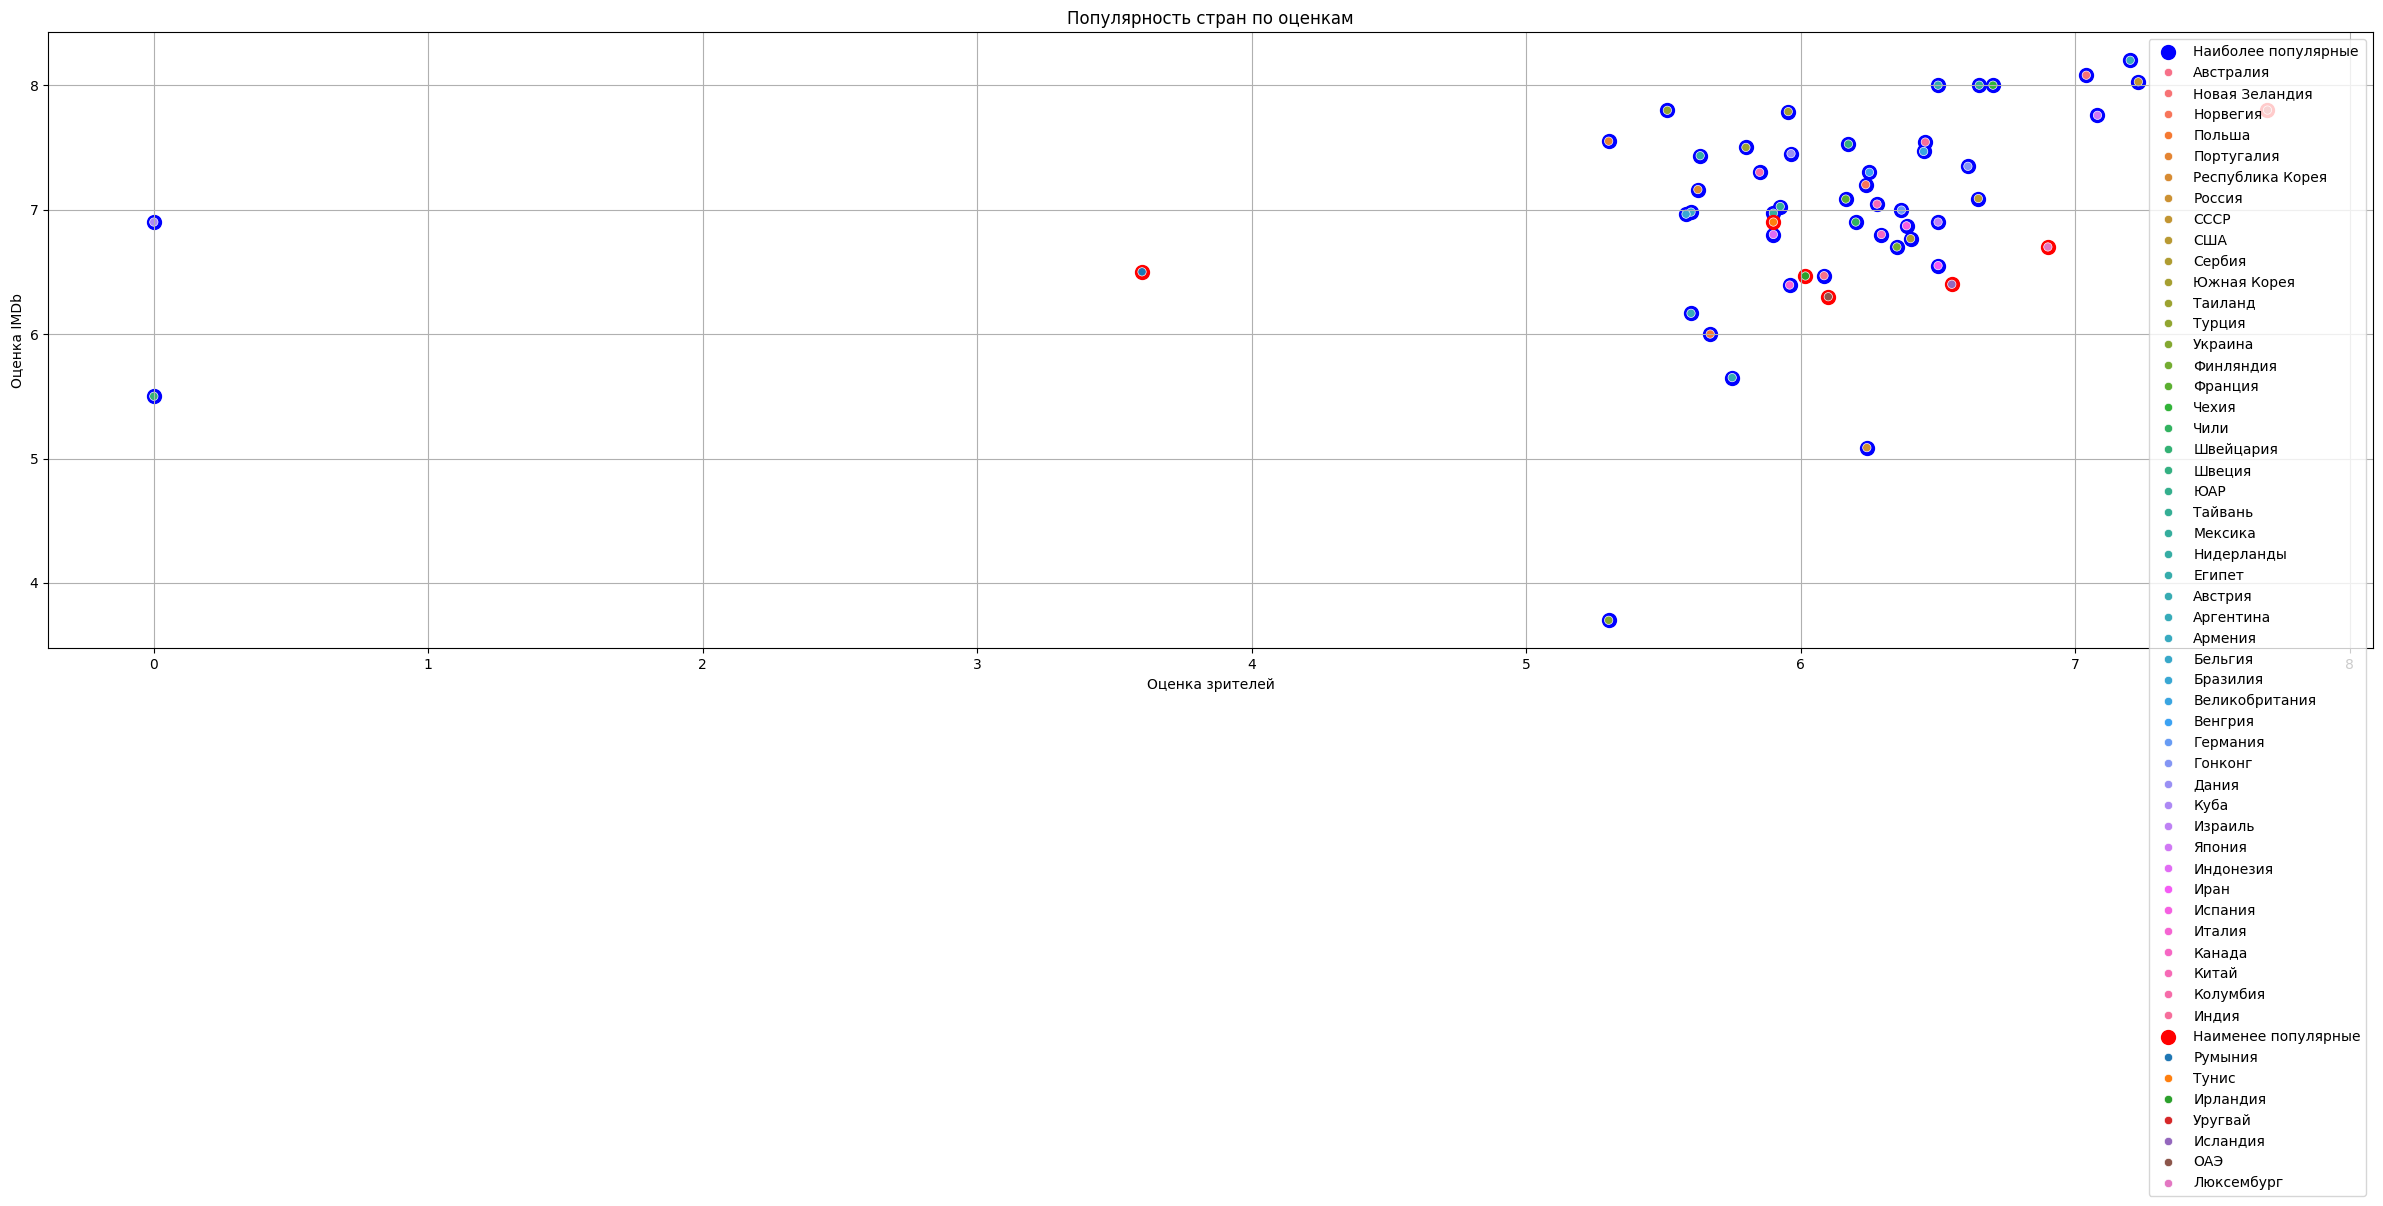

Silhouette Score на обучающей выборке: 0.08836969490573231


In [25]:
# Вычисление средних оценок для каждой страны
country_ratings = new_df.groupby('Страна')[['Оценка зрителей', 'Оценка сайта', 'Оценка IMDb']].mean().reset_index()

# Нормализация данных
scaler = StandardScaler()
scaled_ratings = scaler.fit_transform(country_ratings[['Оценка зрителей', 'Оценка сайта', 'Оценка IMDb']])


# Кластеризация с помощью KMeans
kmeans = KMeans(n_clusters=2, random_state=35)
country_ratings['Popularity_Cluster'] = kmeans.fit_predict(scaled_ratings)

country_ratings['Popularity'] = country_ratings['Popularity_Cluster'].map({0: 'Наименее популярные', 1: 'Наиболее популярные'})
country_ratings = country_ratings.sort_values('Popularity')
print(country_ratings[['Страна', 'Popularity', 'Оценка зрителей', 'Оценка сайта', 'Оценка IMDb']])

popular_df = country_ratings[country_ratings['Popularity'] == 'Наиболее популярные']
unpopular_df = country_ratings[country_ratings['Popularity'] == 'Наименее популярные']

# Построение графика
plt.figure(figsize=(30,8))
plt.scatter(popular_df['Оценка зрителей'], popular_df['Оценка IMDb'],
            color='blue', label='Наиболее популярные', s=100)
sns.scatterplot(data=popular_df, x='Оценка зрителей', y='Оценка IMDb', hue='Страна')

plt.scatter(unpopular_df['Оценка зрителей'], unpopular_df['Оценка IMDb'],
            color='red', label='Наименее популярные', s=100)
sns.scatterplot(data=unpopular_df, x='Оценка зрителей', y='Оценка IMDb', hue='Страна')


plt.title('Популярность стран по оценкам')
plt.xlabel('Оценка зрителей')
plt.ylabel('Оценка IMDb')
plt.legend()
plt.grid(True)
plt.show()

#Измерение качества
train_score = silhouette_score(scaled_ratings, country_ratings['Popularity'])
print(f'Silhouette Score на обучающей выборке: {train_score}')


Работа с моделью обучения без родителя с помощью dbsca

Наиболее популярные страны:
              Страна  Оценка зрителей  Оценка сайта  Оценка IMDb  Кластер
3            Армения         7.200000      0.000000     8.200000        0
4            Бельгия         5.600000      1.200000     6.980000        1
5           Бразилия         5.581818      0.636364     6.963636        1
6     Великобритания         6.447464      2.039855     7.467391        2
7            Венгрия         6.250000      0.000000     7.300000        3
8           Германия         6.366667      2.518519     6.996296        4
9            Гонконг         6.608696      0.000000     7.347826        3
10             Дания         5.964286      2.500000     7.450000        2
11            Египет         6.500000      0.000000     8.000000        5
12           Израиль         6.500000      0.000000     6.900000        6
13             Индия         6.453571      0.125000     7.542857        3
14         Индонезия         5.900000      0.000000     6.800000        6
20        

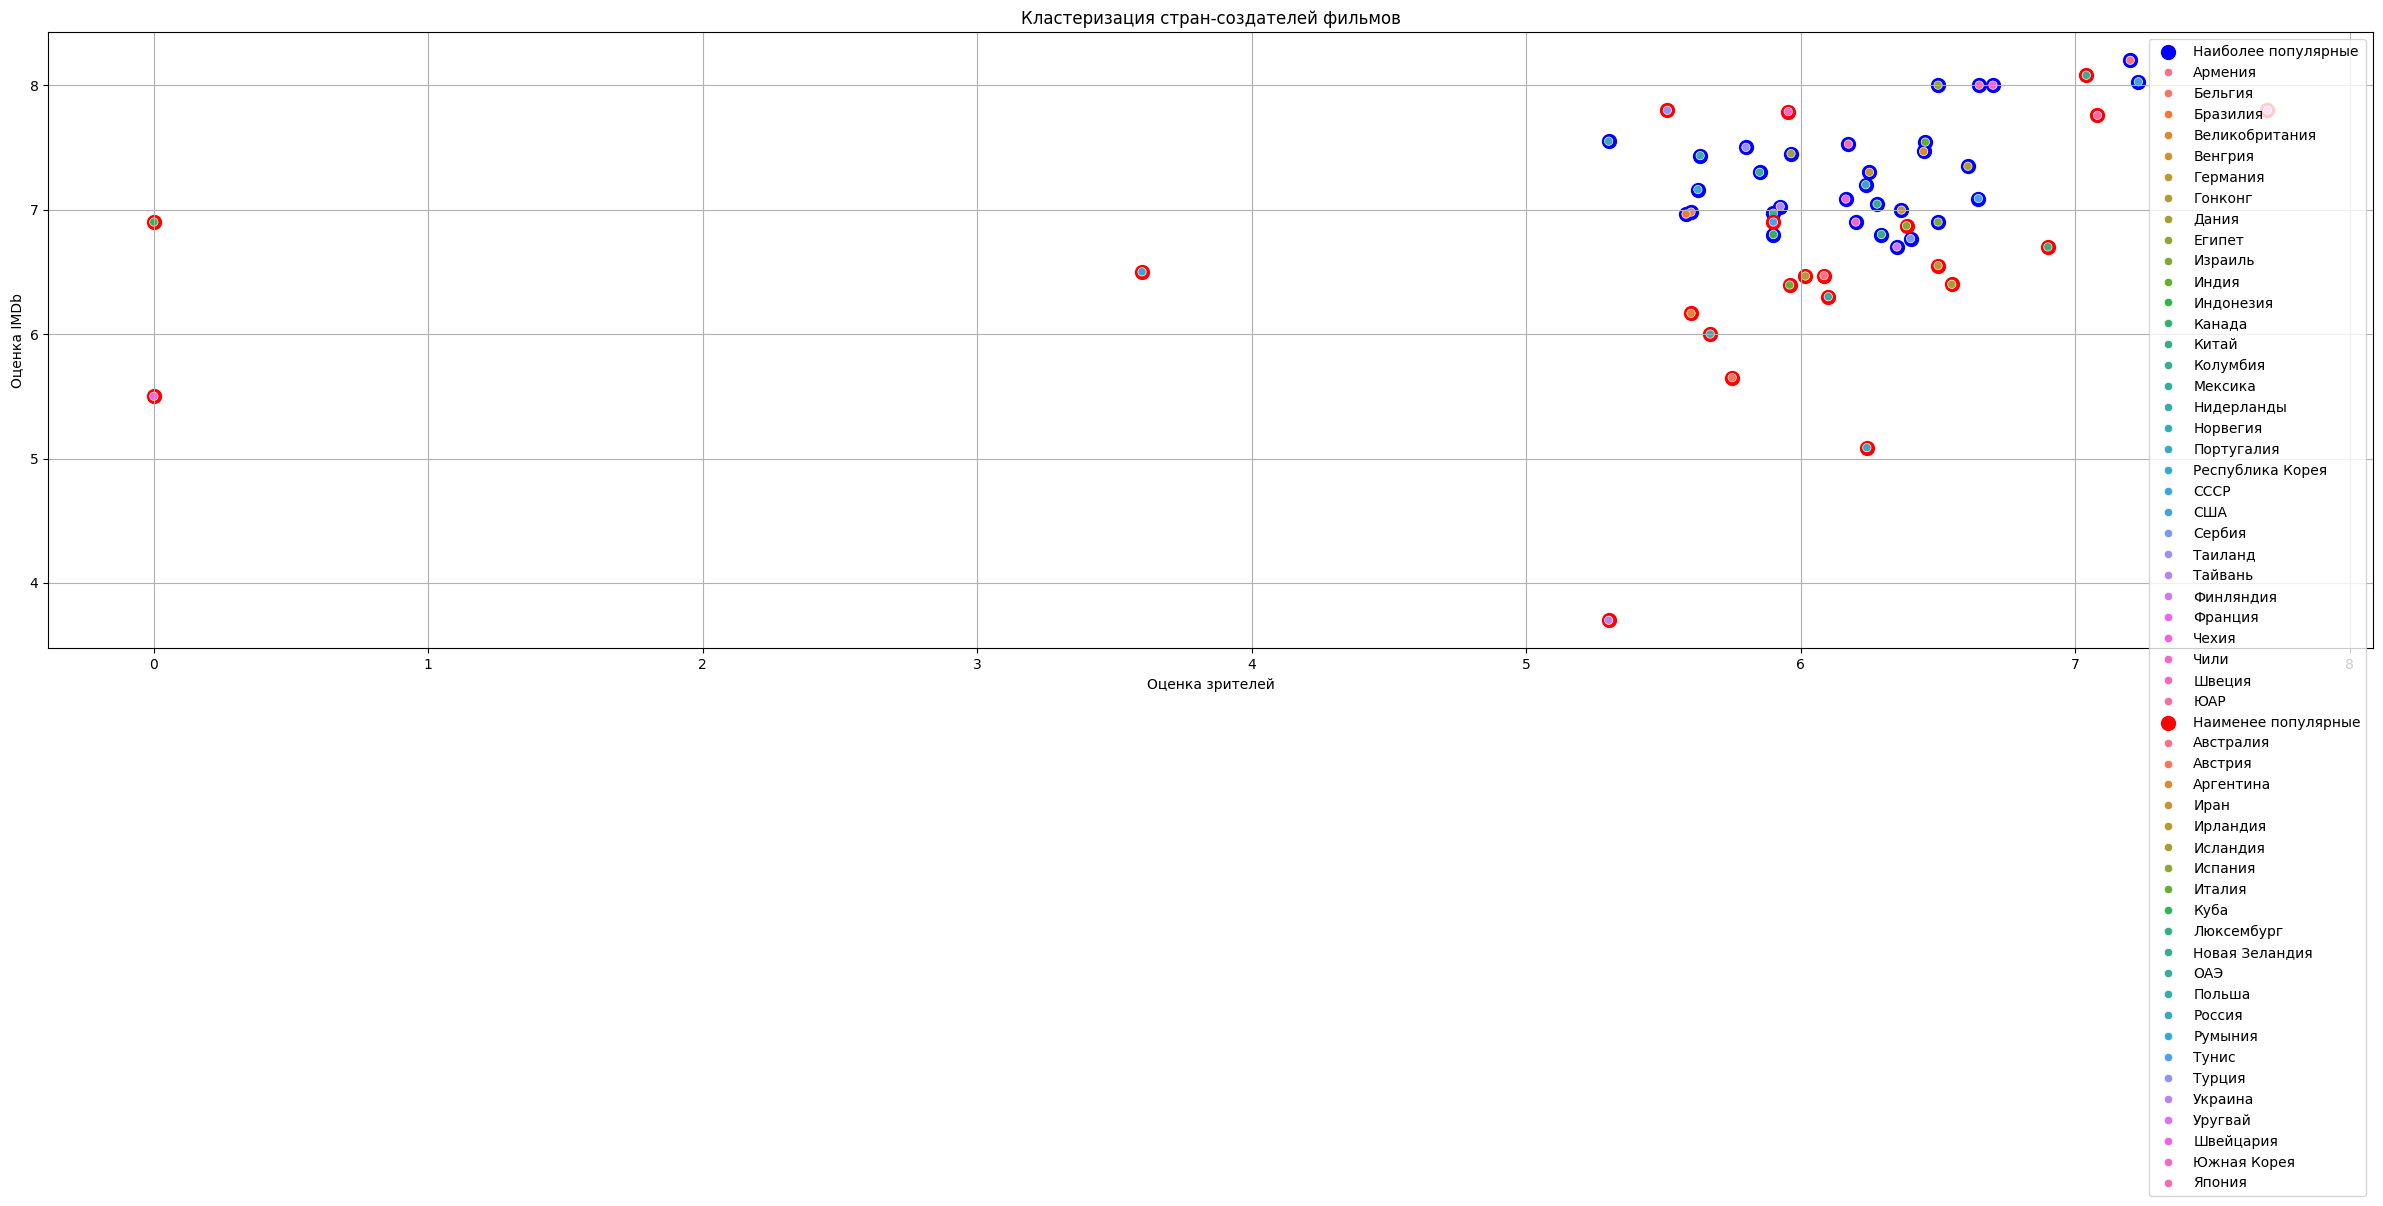

Silhouette Score на обучающей выборке: 0.11385916699695592


In [26]:
# Вычисление средних оценок для каждой страны
country_ratings = new_df.groupby('Страна')[['Оценка зрителей', 'Оценка сайта', 'Оценка IMDb']].mean().reset_index()
country_ratings
df_answers = pd.get_dummies(country_ratings).astype(int)
df_answers


# Выбор признаков для кластеризации
# Нормализация данных
scaler = StandardScaler()
scaled_ratings = scaler.fit_transform(country_ratings[['Оценка зрителей', 'Оценка сайта', 'Оценка IMDb']])

# Применение DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2)
country_ratings['Кластер'] = dbscan.fit_predict(scaled_ratings)

# Разделение на наиболее и наименее популярные страны
popular_df = country_ratings[country_ratings['Кластер'] != -1]
unpopular_df = country_ratings[country_ratings['Кластер'] == -1]

print("Наиболее популярные страны:")
print(popular_df)
print("Наименее популярные страны:")
print(unpopular_df)

# Визуализация результатов
plt.figure(figsize=(30, 8))
plt.scatter(popular_df['Оценка зрителей'], popular_df['Оценка IMDb'],
            c='blue', label='Наиболее популярные', s=100)
sns.scatterplot(data=popular_df, x='Оценка зрителей', y='Оценка IMDb', hue='Страна')

plt.scatter(unpopular_df['Оценка зрителей'], unpopular_df['Оценка IMDb'],
            c='red', label='Наименее популярные', s=100)
sns.scatterplot(data=unpopular_df, x='Оценка зрителей', y='Оценка IMDb', hue='Страна')

# Настройки графика
plt.title('Кластеризация стран-создателей фильмов')
plt.xlabel('Оценка зрителей')
plt.ylabel('Оценка IMDb')
plt.legend()
plt.grid(True)
plt.show()

#Измерение качества
train_score = silhouette_score(scaled_ratings, country_ratings['Кластер'])
print(f'Silhouette Score на обучающей выборке: {train_score}')

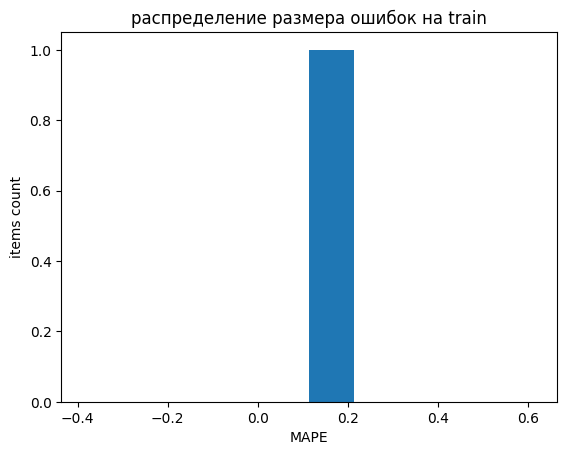

In [33]:
plt.hist(train_score)
plt.title('распределение размера ошибок на train')
plt.xlabel('MAPE')
plt.ylabel('items count')
plt.show()

Перебор гиперпараметров для поиска лучшего

In [34]:
country_ratings = new_df.groupby('Страна')[['Оценка зрителей', 'Оценка сайта', 'Оценка IMDb']].mean().reset_index()
scaler = StandardScaler()
features_scaled = scaler.fit_transform(country_ratings[['Оценка зрителей', 'Оценка сайта', 'Оценка IMDb']])

param_grid = {
    'eps': np.arange(0.1, 1.0, 0.2),
    'min_samples': range(1, 10)
}

dbscan = DBSCAN()

# Оценка качества кластеризации
def evaluate_model(eps, min_samples):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(features_scaled)
    if len(set(labels)) > 1:
        return silhouette_score(features_scaled, labels)
    else:
        return -1


best_score = -1
best_params = {}
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        score = evaluate_model(eps, min_samples)
        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples}

print(f'Лучшие гиперпараметры: {best_params}, Silhouette Score: {best_score}')



Лучшие гиперпараметры: {'eps': 0.9000000000000001, 'min_samples': 5}, Silhouette Score: 0.4733294710881331


Переобучение с подобранными лучшими гиперпараметрами: eps=0.9, min_samples=5

Наиболее популярные страны:
              Страна  Оценка зрителей  Оценка сайта  Оценка IMDb  Кластер
0          Австралия         6.084615      3.115385     6.469231        0
2          Аргентина         5.600000      2.000000     6.166667        0
3            Армения         7.200000      0.000000     8.200000        0
4            Бельгия         5.600000      1.200000     6.980000        0
5           Бразилия         5.581818      0.636364     6.963636        0
6     Великобритания         6.447464      2.039855     7.467391        0
7            Венгрия         6.250000      0.000000     7.300000        0
8           Германия         6.366667      2.518519     6.996296        0
9            Гонконг         6.608696      0.000000     7.347826        0
10             Дания         5.964286      2.500000     7.450000        0
11            Египет         6.500000      0.000000     8.000000        0
12           Израиль         6.500000      0.000000     6.900000        0
13        

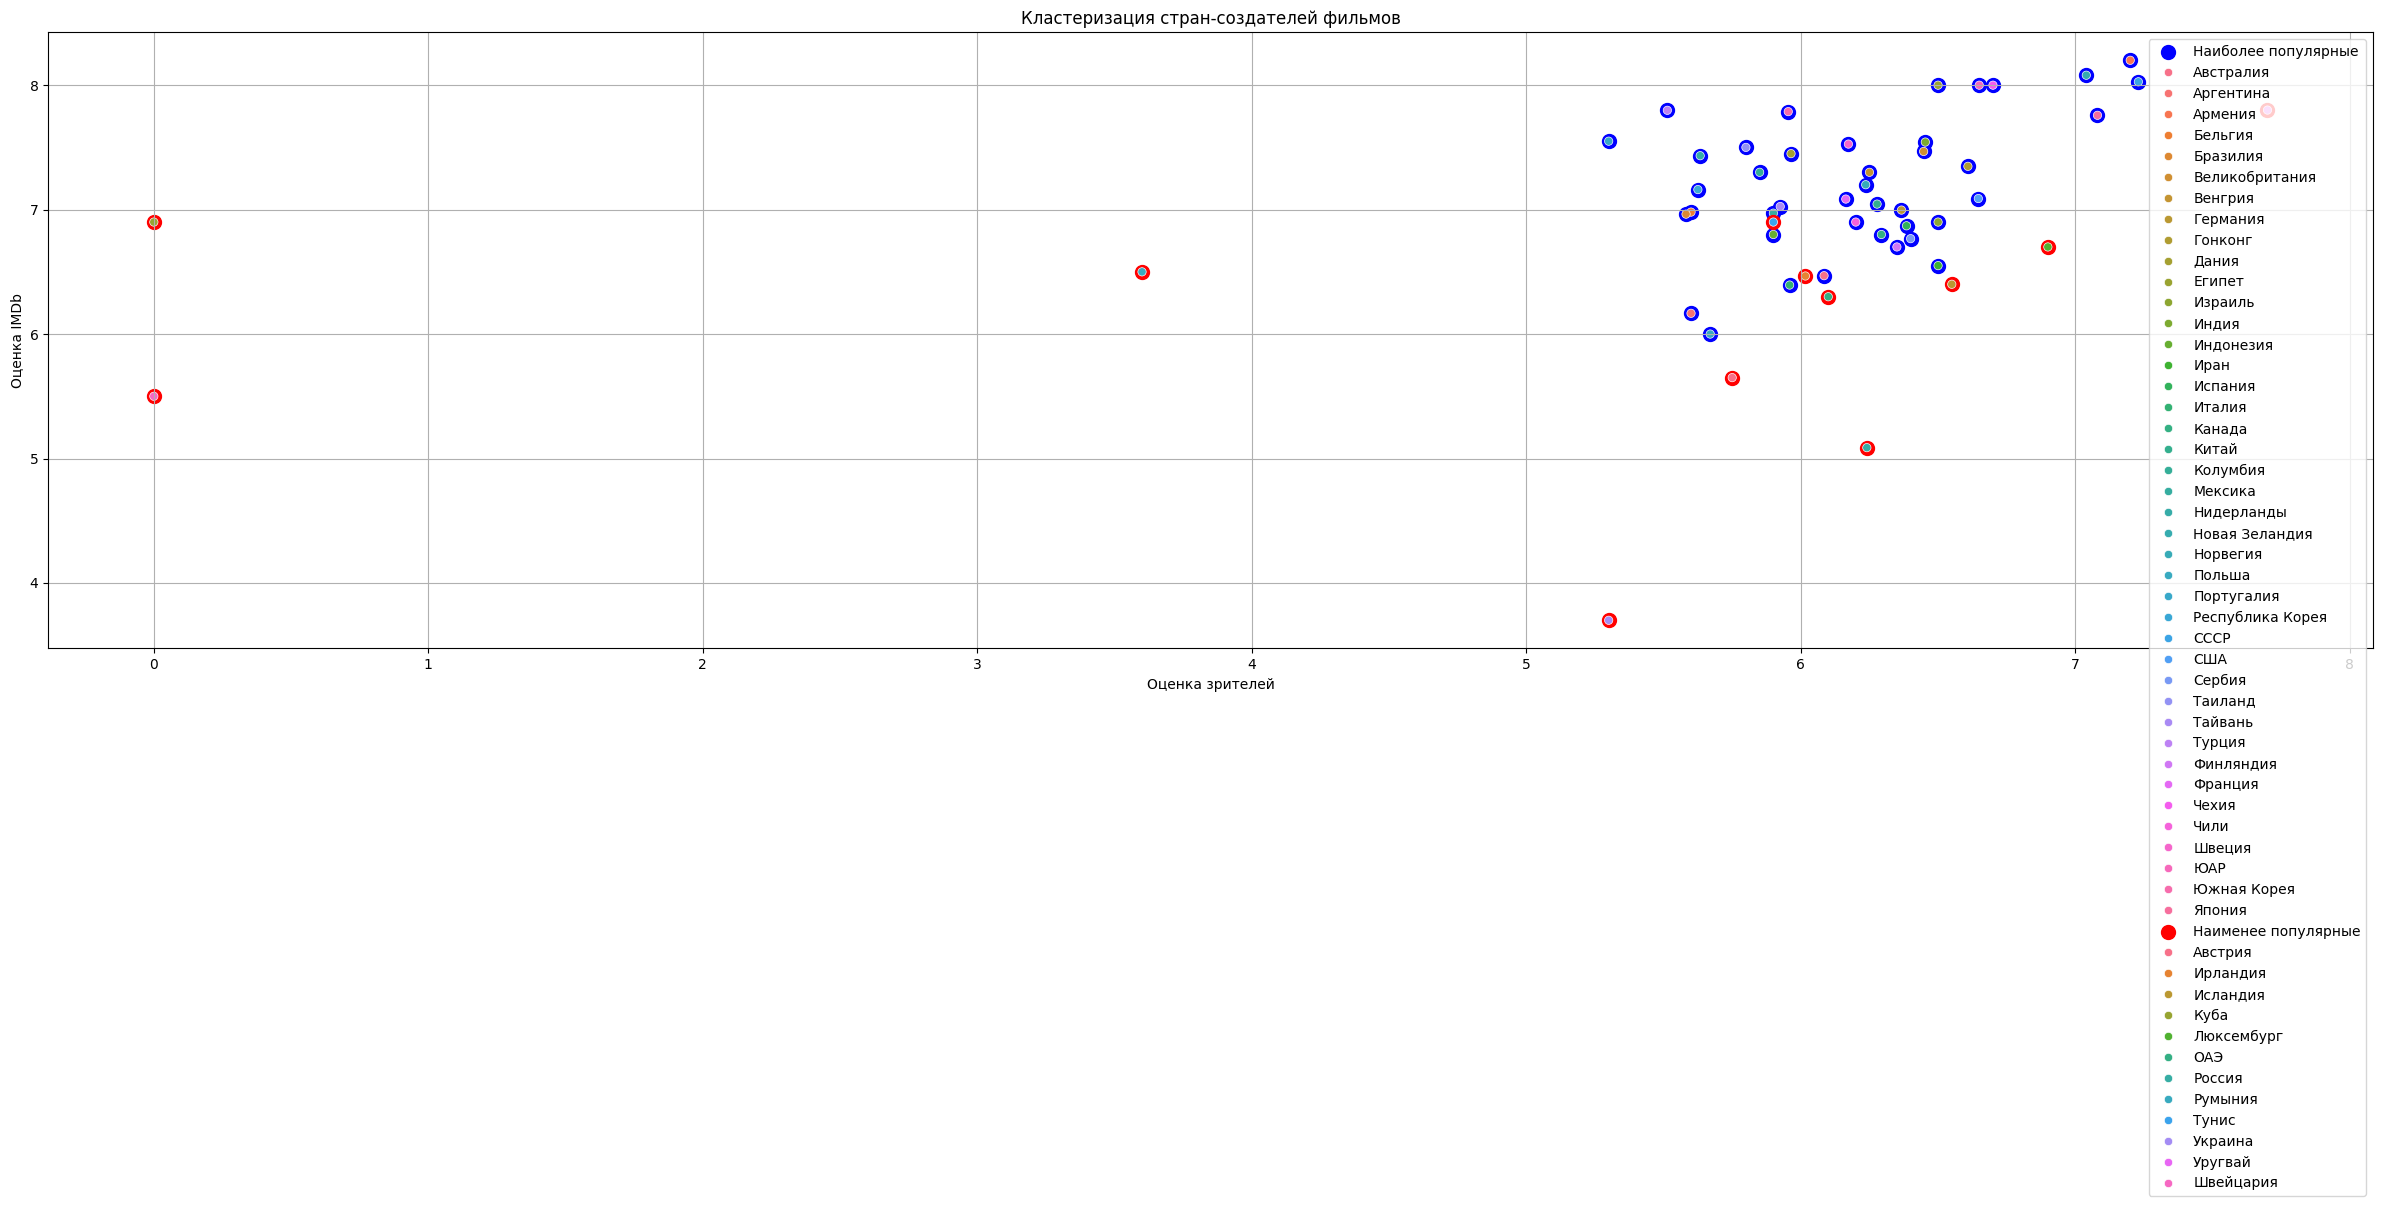

Silhouette Score на обучающей выборке: 0.4733294710881331


In [35]:
# Вычисление средних оценок для каждой страны
country_ratings = new_df.groupby('Страна')[['Оценка зрителей', 'Оценка сайта', 'Оценка IMDb']].mean().reset_index()
country_ratings
df_answers = pd.get_dummies(country_ratings).astype(int)
df_answers

scaler = StandardScaler()
scaled_ratings = scaler.fit_transform(country_ratings[['Оценка зрителей', 'Оценка сайта', 'Оценка IMDb']])

# Применение DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)
country_ratings['Кластер'] = dbscan.fit_predict(scaled_ratings)

popular_df = country_ratings[country_ratings['Кластер'] != -1]
unpopular_df = country_ratings[country_ratings['Кластер'] == -1]

print("Наиболее популярные страны:")
print(popular_df)
print("Наименее популярные страны:")
print(unpopular_df)

# Визуализация результатов
plt.figure(figsize=(30, 8))
plt.scatter(popular_df['Оценка зрителей'], popular_df['Оценка IMDb'],
            c='blue', label='Наиболее популярные', s=100)
sns.scatterplot(data=popular_df, x='Оценка зрителей', y='Оценка IMDb', hue='Страна')

plt.scatter(unpopular_df['Оценка зрителей'], unpopular_df['Оценка IMDb'],
            c='red', label='Наименее популярные', s=100)
sns.scatterplot(data=unpopular_df, x='Оценка зрителей', y='Оценка IMDb', hue='Страна')

# Настройки графика
plt.title('Кластеризация стран-создателей фильмов')
plt.xlabel('Оценка зрителей')
plt.ylabel('Оценка IMDb')
plt.legend()
plt.grid(True)
plt.show()

#Измерение качества
train_score = silhouette_score(scaled_ratings, country_ratings['Кластер'])
print(f'Silhouette Score на обучающей выборке: {train_score}')

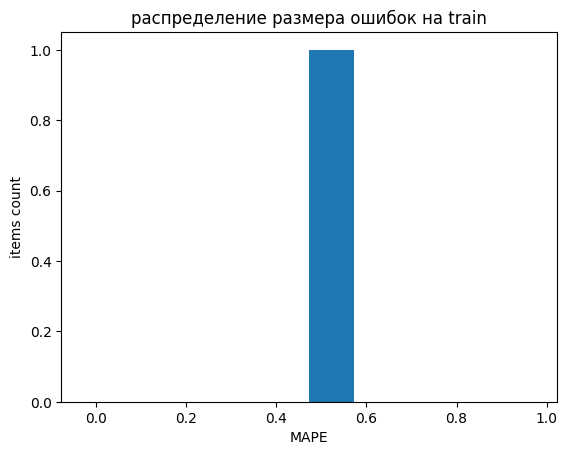

In [36]:
plt.hist(train_score)
plt.title('распределение размера ошибок на train')
plt.xlabel('MAPE')
plt.ylabel('items count')
plt.show()

Собственная реализация dbscan

In [37]:
def findNeighbours(dataframe, element, eps):
    neighbours = []
    for i in range(0, len(dataframe)):
        if np.linalg.norm(dataframe[element] - dataframe[i]) < eps:
           neighbours.append(i)

    return neighbours


def createCluster(dataframe, labels, element, neighbour_points, current_cluster, eps, min_smpls):
    labels[element] = current_cluster
    i = 0
    while i < len(neighbour_points):
        current_neighbour = neighbour_points[i]
        if labels[current_neighbour] == -1:
           labels[current_neighbour] = current_cluster
        elif labels[current_neighbour] == 0:
            labels[current_neighbour] = current_cluster
            curr_neighbour_points = findNeighbours(dataframe, current_neighbour, eps)
            if len(curr_neighbour_points) >= min_smpls:
                neighbour_points = neighbour_points + curr_neighbour_points
        i += 1

def MyDBSCAN(dataframe, eps, min_smpls):
    labels = [0]*len(dataframe)
    current_cluster = 0
    for i in range(0, len(dataframe)):
        if not (labels[i] == 0):
           continue
        neighbour_point = findNeighbours(dataframe, i, eps)

        if len(neighbour_point) < min_smpls:
            labels[i] = -1
        else:
           current_cluster += 1
           createCluster(dataframe, labels, i, neighbour_point, current_cluster, eps, min_smpls)
    return labels

Наиболее популярные страны:
              Страна  Оценка зрителей  Оценка сайта  Оценка IMDb  Кластер
0          Австралия         6.084615      3.115385     6.469231        1
2          Аргентина         5.600000      2.000000     6.166667        1
3            Армения         7.200000      0.000000     8.200000        1
4            Бельгия         5.600000      1.200000     6.980000        1
5           Бразилия         5.581818      0.636364     6.963636        1
6     Великобритания         6.447464      2.039855     7.467391        1
7            Венгрия         6.250000      0.000000     7.300000        1
8           Германия         6.366667      2.518519     6.996296        1
9            Гонконг         6.608696      0.000000     7.347826        1
10             Дания         5.964286      2.500000     7.450000        1
11            Египет         6.500000      0.000000     8.000000        1
12           Израиль         6.500000      0.000000     6.900000        1
13        

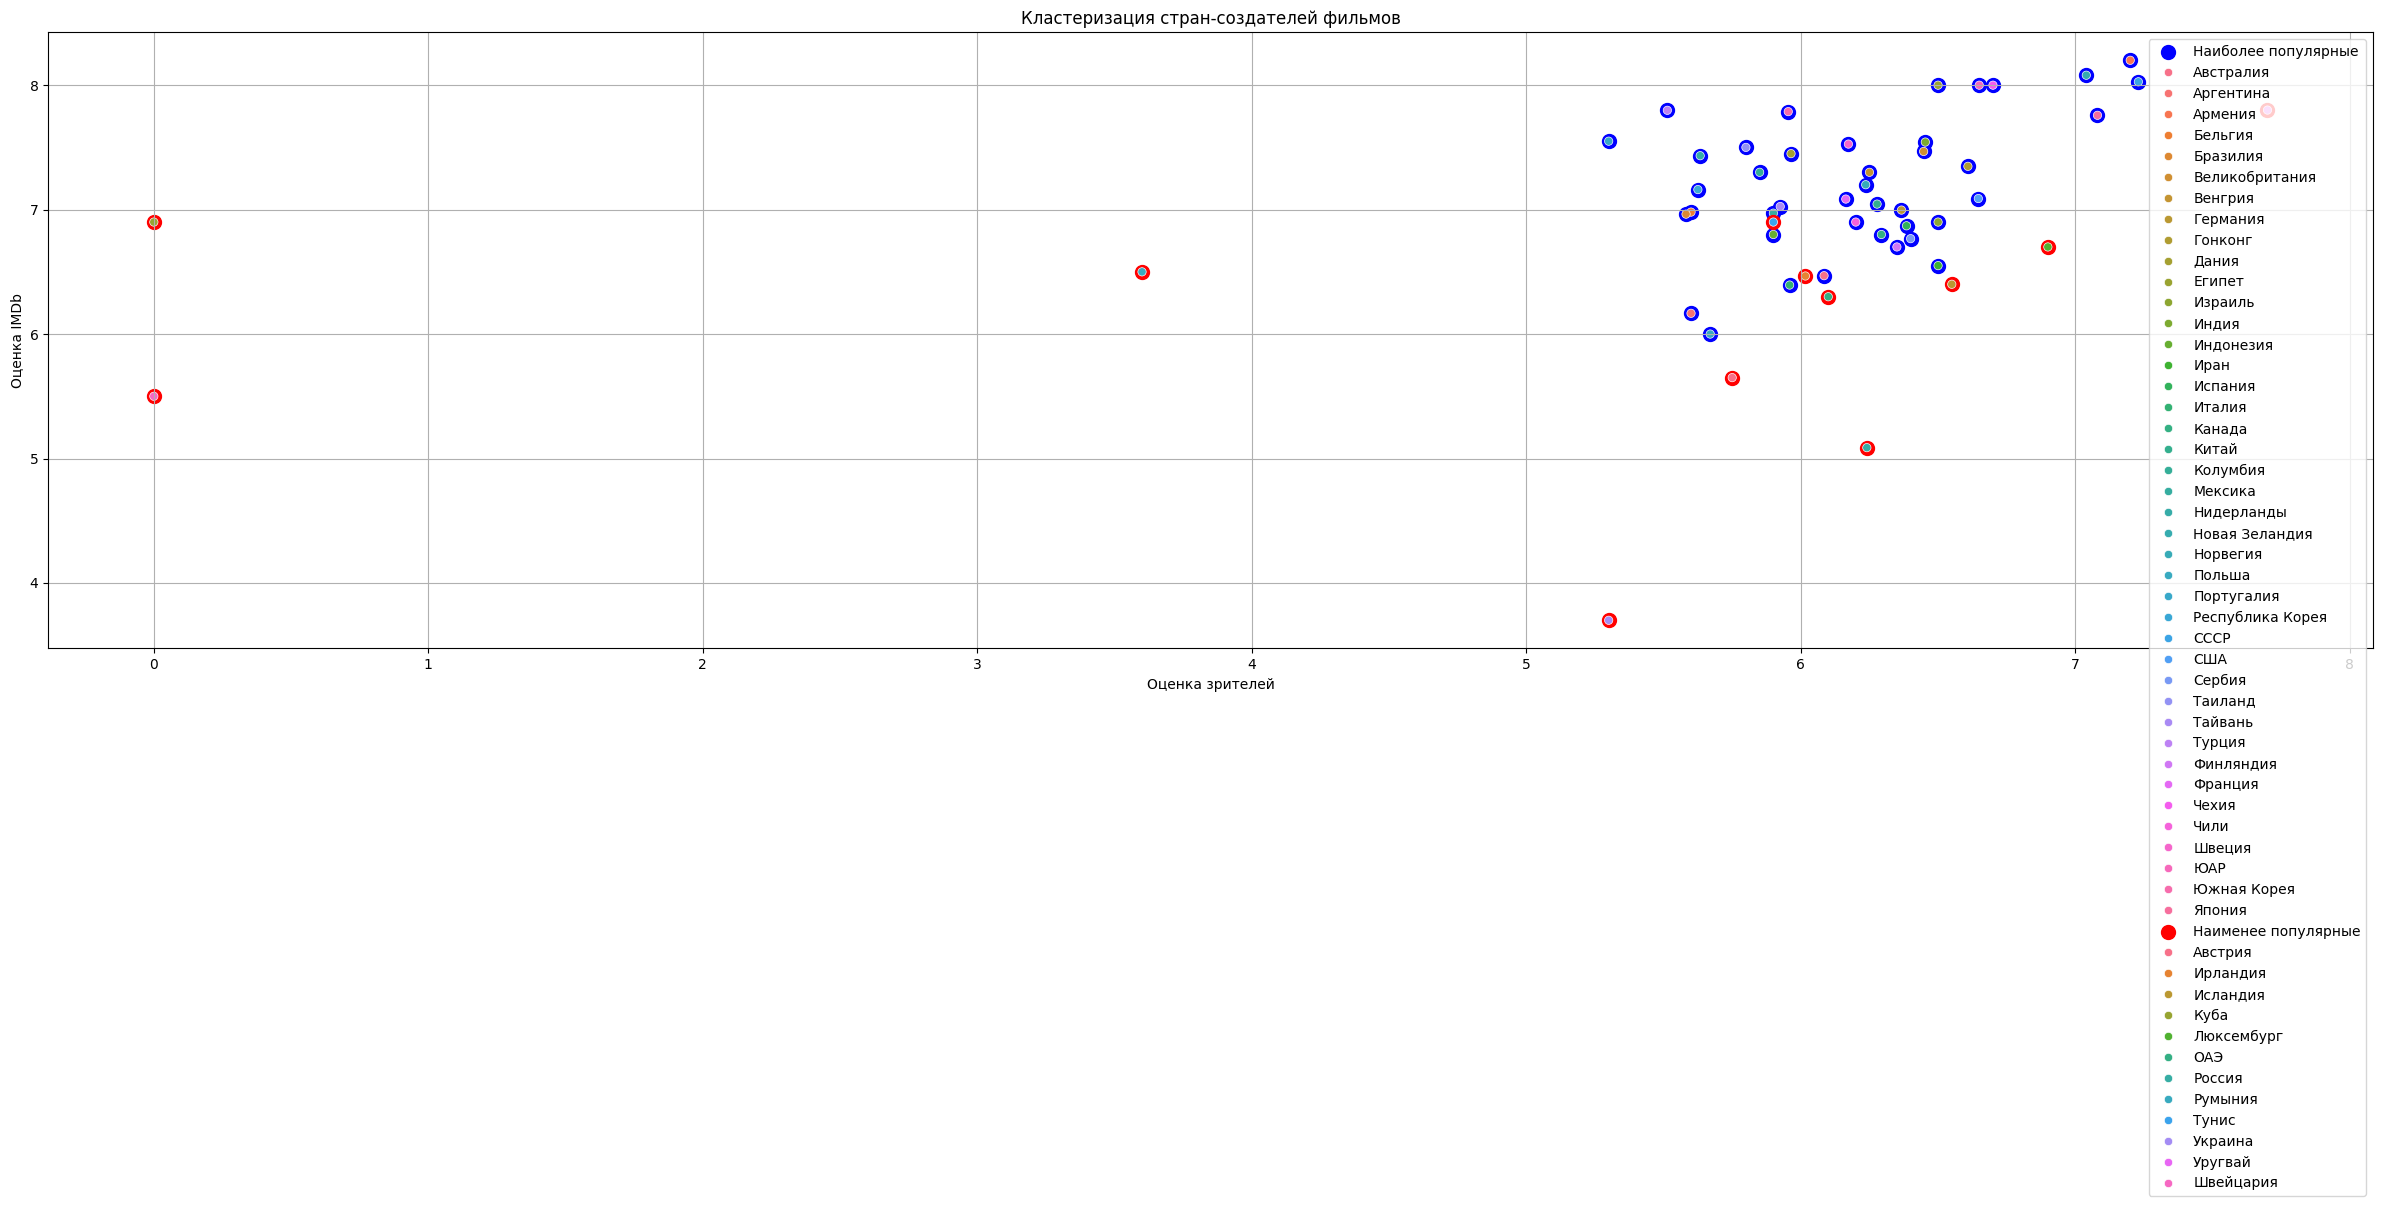

Silhouette Score на обучающей выборке: 0.4733294710881331


In [39]:
my_country_ratings = new_df.groupby('Страна')[['Оценка зрителей', 'Оценка сайта', 'Оценка IMDb']].mean().reset_index()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
my_scaled_ratings = scaler.fit_transform(my_country_ratings[['Оценка зрителей', 'Оценка сайта', 'Оценка IMDb']])

my_country_ratings['Кластер'] = MyDBSCAN(my_scaled_ratings, eps=0.9, min_smpls=5)

my_popular_df = my_country_ratings[my_country_ratings['Кластер'] != -1]
my_unpopular_df = my_country_ratings[my_country_ratings['Кластер'] == -1]

print("Наиболее популярные страны:")
print(my_popular_df)
print("Наименее популярные страны:")
print(my_unpopular_df)

plt.figure(figsize=(30, 8))
plt.scatter(my_popular_df['Оценка зрителей'], my_popular_df['Оценка IMDb'],
                        c='blue', label='Наиболее популярные', s=100)
sns.scatterplot(data=my_popular_df, x='Оценка зрителей', y='Оценка IMDb', hue='Страна')

plt.scatter(my_unpopular_df['Оценка зрителей'], my_unpopular_df['Оценка IMDb'],
                        c='red', label='Наименее популярные', s=100)
sns.scatterplot(data=my_unpopular_df, x='Оценка зрителей', y='Оценка IMDb', hue='Страна')

plt.title('Кластеризация стран-создателей фильмов')
plt.xlabel('Оценка зрителей')
plt.ylabel('Оценка IMDb')
plt.legend()
plt.grid(True)
plt.show()

#Измерение качества
my_train_score = silhouette_score(my_scaled_ratings, my_country_ratings['Кластер'])
print(f'Silhouette Score на обучающей выборке: {my_train_score}')

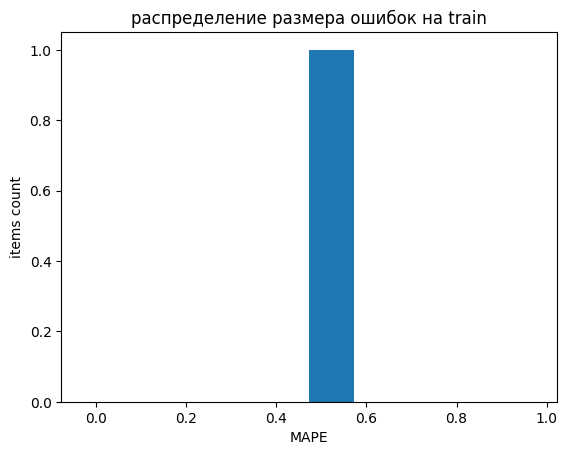

In [40]:
plt.hist(my_train_score)
plt.title('распределение размера ошибок на train')
plt.xlabel('MAPE')
plt.ylabel('items count')
plt.show()

Сравнение качества моей модели с моделью из фреймворка

In [41]:
#Измерение качества с реализацией алгоритма фреймворка
train_score = silhouette_score(scaled_ratings, country_ratings['Кластер'])
print(f'Silhouette Score на обучающей выборке: {train_score}')


#Измерение качества с моей реализацией алгоритма
my_train_score = silhouette_score(my_scaled_ratings, my_country_ratings['Кластер'])
print(f'Silhouette Score на обучающей выборке: {my_train_score}')

Silhouette Score на обучающей выборке: 0.4733294710881331
Silhouette Score на обучающей выборке: 0.4733294710881331


С правильно подобранными гиперпараметры получился одинаковый результат, что говорит о том, что мой алгоритм корректен и работает не хуже "готового"